## Декораторы

Декоратор — это функция, которая позволяет обернуть другую функцию для расширения её функциональности без непосредственного изменения её кода. 

In [6]:
def hello_world():
    print('Hello world')

In [7]:
hello = hello_world

In [8]:
hello()

Hello world


In [29]:
def wrapper_func():
    def hello_world():
        print('Hello world')
    hello_world()
    
wrapper_func()

Hello world


In [10]:
def first(func):
    print('Got function {} as an arg'.format(func))
    func()
    print('Exit')
    
first(hello_world)

Got function <function hello_world at 0x00000295A6675D30> as an arg
Hello world
Exit


In [12]:
def decorated_func(func):
    def wrapper():
        print('Wrapper func')
        func()
    return wrapper

In [13]:
hello = decorated_func(hello_world)

In [16]:
hello()

Wrapper func
Hello world


In [17]:
@decorated_func
def hello_world():
    print('Hello world')
    
hello_world()

Wrapper func
Hello world


In [19]:
def benchmark(func):
    import time
    
    def wrapper():
        start = time.time()
        func()
        end = time.time()
        print('[*] Время выполнения: {} секунд.'.format(end-start))
    return wrapper

@benchmark
def fetch_webpage():
    import requests
    webpage = requests.get('https://google.com')

fetch_webpage()

[*] Время выполнения: 0.30782580375671387 секунд.


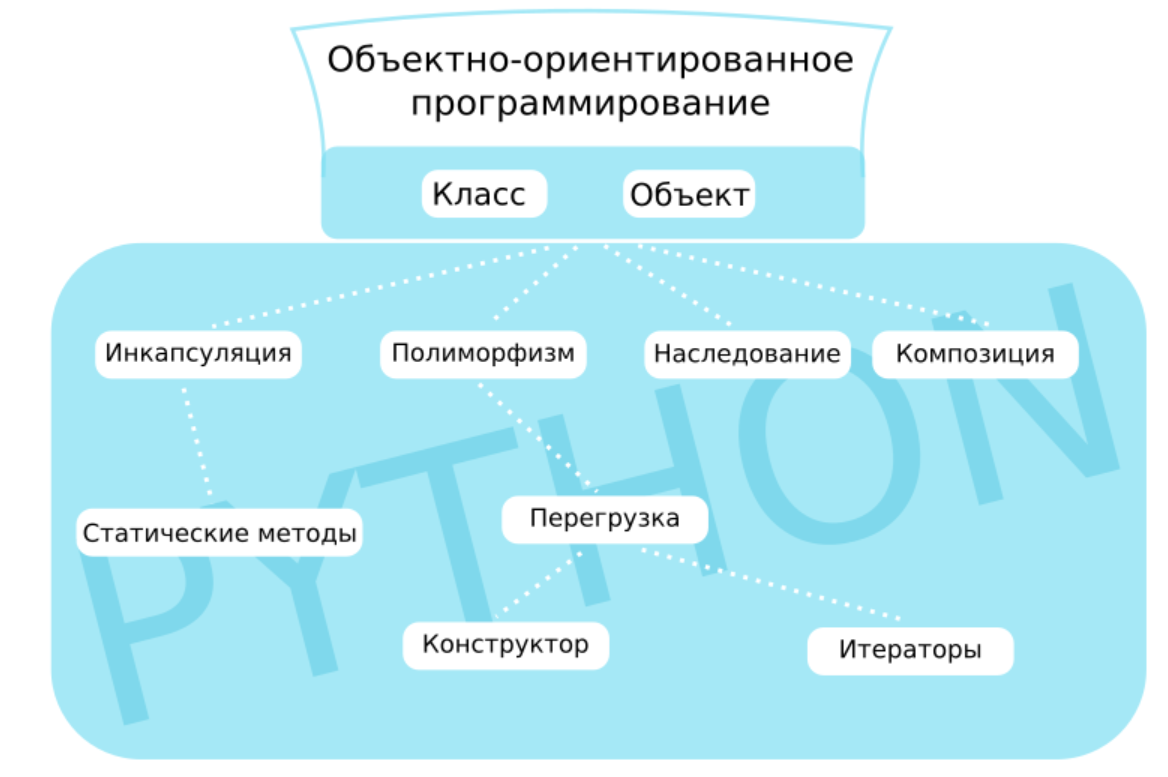

In [21]:
class A:
    # methods
    pass

In [22]:
a = A()

In [23]:
b = A()

### Класс как модуль
В языке программирования Python класс можно представить подобным модулю. Также как в модуле в нем могут быть свои переменные со значениями и функции. Также как в модуле у класса есть собственное пространство имен, доступ к которым возможен через имя класса

In [44]:
class B:
    n = 5
    def add(self, v):
        return self.n + v

In [37]:
B.n

5

In [35]:
B.add(1)

TypeError: add() missing 1 required positional argument: 'v'

In [45]:
l = B()

In [46]:
l.n

5

In [47]:
l.add(2, 4)

TypeError: add() takes 2 positional arguments but 3 were given

In [41]:
l.n = 6

In [42]:
l.n

6

In [43]:
B.n

5

In [53]:
B.add(l, 2)

TypeError: unsupported operand type(s) for +: 'int' and 'B'

### Класс как создатель объектов

### Изменение полей объекта
В Python объекту можно не только переопределять поля и методы, унаследованные от класса, также можно добавить новые, которых нет в классе

In [48]:
l.test = 'hi'

In [50]:
l.test

'hi'

### Атрибут ______dict__
Его значением является словарь, в котором ключи – это имена свойств экземпляра, а значения – текущие значения свойств.

In [55]:
class B:
    n = 5
    def add(self, v):
        return self.n + v

In [56]:
w = B()

In [57]:
B.__dict__

mappingproxy({'__module__': '__main__',
              'n': 5,
              'add': <function __main__.B.add(self, v)>,
              '__dict__': <attribute '__dict__' of 'B' objects>,
              '__weakref__': <attribute '__weakref__' of 'B' objects>,
              '__doc__': None})

In [58]:
w.b = 17
w.__dict__

{'b': 17}

### Конструктор класса – метод ______init__()

In [74]:
class Person:
    def setName(self, n, s):
        self.name = n
        self.surname = s
        
p = Person()
p.setName('Ivan', 'Petrov')

In [75]:
class Person:
    def __init__(self, n, s):
        self.name = n
        self.surname = s

p1 = Person('Ivan', 'Petrov')
print(p1.name, p1.surname)

Ivan Petrov


In [59]:
p2 = Person()

NameError: name 'Person' is not defined

## Наследование

In [66]:
class Table:
    def __init__(self, l=1, w=1, h=1):
        self.length = l
        self.width = w
        self.height = h

class KitchenTable(Table):
    def setPlaces(self, p):
        self.places = p


class DeskTable(Table):
    def square(self):
        return self.width * self.length

In [67]:
t1 = KitchenTable(2, 2, 2)

In [68]:
t2 = DeskTable(1, 3, 5)

In [69]:
class ComputerTable(DeskTable):
    def square(self, e):
        return DeskTable.square(self) - e

In [70]:
ct = ComputerTable()

In [65]:
ct.square(0.1)

0.9

## Инкапсуляция

In [84]:
class B:
#     __count = 0
#     def __init__(self):
#         B.count += 1
#     def __del__(self):
#         B.count -= 1
#     def get_count():
#         return B.__count
    def __private (self):
        print ('private method!!!')

In [86]:
b = B()
b._B__private()

private method!!!


In [76]:
B.get_count()

0

In [80]:
b.__count

AttributeError: 'B' object has no attribute '_B__count'

In [81]:
B._B__count

0

In [78]:
b = B()

AttributeError: type object 'B' has no attribute 'count'

In [96]:
B.count

2

In [97]:
del a

In [100]:
B.count

0

### setattr

In [87]:
class A:
     def __init__(self, v):
        self.field1 = v
                
a = A(10)
a.field2 = 20
a.field1, a.field2

(10, 20)

In [88]:
class A:
    def __init__(self, v):
            self.field1 = v
    def __setattr__(self, attr, value):
        if attr == 'field1':
            self.__dict__[attr] = value            
        else:
            raise Exception('AttributeError')

In [89]:
a = A(15)

In [90]:
a.field2 = 20

Exception: AttributeError